In [37]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
import collections

In [38]:
def img_plt(color_img, title, pos):

    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(2, 3, pos)
    plt.imshow(img_RGB)
    plt.title(title)
    plt.axis("off")

fig = plt.figure(figsize=(20, 15))
plt.suptitle("Color Quantization using K-Means")
plt.rcParams['figure.facecolor'] = 'silver'

<Figure size 1440x1080 with 0 Axes>

In [39]:
img = cv2.imread("images/landscape_2.jpg")

In [40]:
def color_quantization(image, k):
    """Performs color quantization using K-means clustering algorithm"""

    # Transform image into 'data':
    data = np.float32(image).reshape((-1, 3))
    # print(data.shape)

    # Define the algorithm termination criteria (the maximum number of iterations and/or the desired accuracy):
    # In this case the maximum number of iterations is set to 20 and epsilon = 1.0
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)

    # Apply K-means clustering algorithm:
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # At this point we can make the image with k colors
    # Convert center to uint8:
    center = np.uint8(center)
    # Replace pixel values with their center value:
    result = center[label.flatten()]
    result = result.reshape(img.shape)

    # Build the 'color_distribution' legend.
    # We will use the number of pixels assigned to each center value:
    counter = collections.Counter(label.flatten())
    print(counter)

    # Calculate the total number of pixels of the input image:
    total = img.shape[0] * img.shape[1]

    # Assign width and height to the color_distribution image:
    desired_width = img.shape[1]
    # The difference between 'desired_height' and 'desired_height_colors'
    # will be the separation between the images
    desired_height = 70
    desired_height_colors = 50

    # Initialize the color_distribution image:
    color_distribution = np.ones((desired_height, desired_width, 3), dtype="uint8") * 255
    # Initialize start:
    start = 0

    for key, value in counter.items():
        # Calculate the normalized value:
        value_normalized = value / total * desired_width

        # Move end to the right position:
        end = start + value_normalized

        # Draw rectangle corresponding to the current color:
        cv2.rectangle(color_distribution, (int(start), 0), (int(end), desired_height_colors), center[key].tolist(), -1)
        # Update start:
        start = end

    return np.vstack((color_distribution, result))

In [41]:
#Applying color quantization 

color_k3 = color_quantization(img, 3)
color_k5 = color_quantization(img, 5)
color_k10 = color_quantization(img, 10)
color_k20 = color_quantization(img, 20)
color_k40 = color_quantization(img, 40)

Counter({2: 175779, 1: 114963, 0: 109258})
Counter({3: 99181, 1: 92086, 4: 89142, 0: 68598, 2: 50993})
Counter({7: 65625, 5: 57095, 2: 47686, 9: 46398, 8: 44717, 3: 39173, 1: 32183, 4: 30140, 0: 22987, 6: 13996})
Counter({8: 38580, 19: 38464, 11: 35033, 10: 34654, 15: 26538, 0: 25030, 13: 22793, 12: 19390, 9: 19179, 1: 18327, 14: 17813, 5: 16676, 6: 16419, 4: 15899, 7: 12384, 17: 12098, 3: 10444, 2: 8980, 16: 5830, 18: 5469})
Counter({24: 30565, 5: 20022, 21: 18324, 30: 17032, 34: 16309, 22: 16039, 19: 15931, 1: 13343, 16: 13046, 10: 12337, 29: 11848, 33: 11759, 14: 11556, 17: 10939, 18: 10224, 6: 9696, 35: 9682, 27: 9609, 25: 9527, 28: 9177, 0: 9077, 26: 8540, 8: 8429, 37: 7964, 38: 7402, 4: 7316, 23: 6924, 32: 6890, 39: 6621, 11: 6414, 15: 6033, 31: 5959, 12: 5525, 36: 5468, 7: 4933, 3: 4659, 13: 4459, 20: 4109, 2: 3613, 9: 2700})


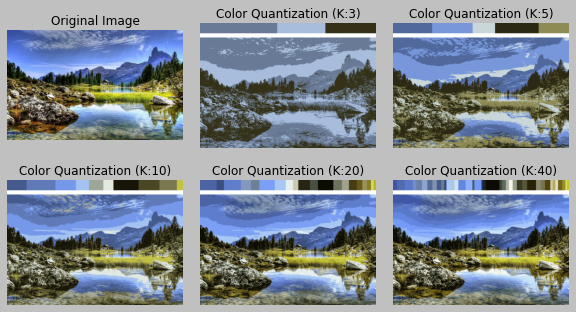

In [42]:
#Plotting the images

img_plt(img, "Original Image", 1)
img_plt(color_k3, "Color Quantization (K:3)", 2)
img_plt(color_k5, "Color Quantization (K:5)", 3)
img_plt(color_k10, "Color Quantization (K:10)", 4)
img_plt(color_k20, "Color Quantization (K:20)", 5)
img_plt(color_k40, "Color Quantization (K:40)", 6)

plt.subplots_adjust(top=3,bottom=2, right=1.6, left=0.3, wspace=0.1, hspace=0.2)
plt.show()